ideas and base taken from lukepolson

In [11]:
#importing relevant packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook'])
from itertools import combinations

Want to get particles and randomise their initial positions

In [14]:
n_particles = 10
r = np.random.random((2,n_particles)) # x and y positions between 0 and 1
ixr = r[0]>0.5#these particles with true start on the right
ixl = r[0]<=0.5#these ones start on the left


Assign IDs to particle to later call them

In [15]:
ids = np.arange(n_particles)
ids

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

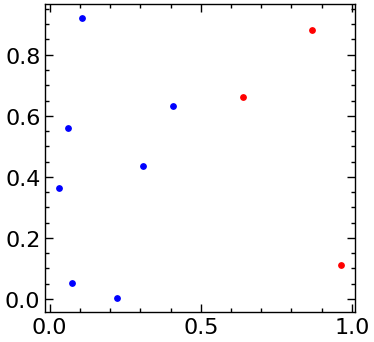

In [23]:
#plot the initial positions of all the particles
plt.figure(figsize = (4,4))
plt.scatter(r[0][ixr], r[1][ixr], color = 'r', s = 15) # plots the x and y position and accesses the particles where the value of ixr is true
plt.scatter(r[0][ixl], r[1][ixl], color = 'b', s = 15)

Set the initial velocities in the gas. particles on the right move to the LHS and vice versa. Speeds = 500 m/s

In [27]:
v = np.zeros((2, n_particles))
v[0][ixr] = -500
v[0][ixl] = 500

Need to know what the velocities of particles will be after colliding with each other.

Firstly, need to find the distances beetween all the pairs of particles, if the distance is < 2 * radius of the particles, they collide. If there are n particles, there are n(n-1)/2 pairs of particles

In [31]:
#get pairs of ids of particles
ids_pairs = np.asarray(list(combinations(ids,2)))
ids_pairs[:,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7,
       8])

Can get pairs of distances as well

In [37]:
x_pairs = np.array([r[0][ids_pairs[:,0]], r[0][ids_pairs[:,1]]]).T # this gets the x positions of each of the particles in a pair, the Transpose makes it columnised
x_pairs

array([[0.22179774, 0.30798306],
       [0.22179774, 0.03243915],
       [0.22179774, 0.96488068],
       [0.22179774, 0.06171583],
       [0.22179774, 0.40866954],
       [0.22179774, 0.10711478],
       [0.22179774, 0.6381723 ],
       [0.22179774, 0.07243474],
       [0.22179774, 0.86803389],
       [0.30798306, 0.03243915],
       [0.30798306, 0.96488068],
       [0.30798306, 0.06171583],
       [0.30798306, 0.40866954],
       [0.30798306, 0.10711478],
       [0.30798306, 0.6381723 ],
       [0.30798306, 0.07243474],
       [0.30798306, 0.86803389],
       [0.03243915, 0.96488068],
       [0.03243915, 0.06171583],
       [0.03243915, 0.40866954],
       [0.03243915, 0.10711478],
       [0.03243915, 0.6381723 ],
       [0.03243915, 0.07243474],
       [0.03243915, 0.86803389],
       [0.96488068, 0.06171583],
       [0.96488068, 0.40866954],
       [0.96488068, 0.10711478],
       [0.96488068, 0.6381723 ],
       [0.96488068, 0.07243474],
       [0.96488068, 0.86803389],
       [0.

delta x is the difference between the particle x positions

In [45]:
dx_pairs = np.diff(x_pairs, axis = 1).ravel() # ravel flattens into a single array
dx_pairs

array([ 0.08618532, -0.1893586 ,  0.74308294, -0.16008191,  0.1868718 ,
       -0.11468296,  0.41637456, -0.149363  ,  0.64623615, -0.27554392,
        0.65689762, -0.24626723,  0.10068648, -0.20086828,  0.33018924,
       -0.23554832,  0.56005083,  0.93244153,  0.02927669,  0.3762304 ,
        0.07467563,  0.60573316,  0.0399956 ,  0.83559474, -0.90316485,
       -0.55621114, -0.8577659 , -0.32670838, -0.89244594, -0.09684679,
        0.34695371,  0.04539895,  0.57645647,  0.01071891,  0.80631806,
       -0.30155476,  0.22950276, -0.3362348 ,  0.45936435,  0.53105752,
       -0.03468004,  0.76091911, -0.56573756,  0.22986159,  0.79559915])

Euclidean distance for x and y coordinates between particles

In [47]:
x_pairs = np.array([r[0][ids_pairs[:,0]], r[0][ids_pairs[:,1]]]).T
y_pairs = np.array([r[1][ids_pairs[:,0]], r[1][ids_pairs[:,1]]]).T
dx_pairs = np.diff(x_pairs, axis =1).ravel()
dy_pairs = np.diff(y_pairs, axis =1).ravel()
d_pairs = np.sqrt(dx_pairs**2 + dy_pairs**2)
d_pairs

array([0.44263381, 0.40646525, 0.75073607, 0.57995805, 0.65505388,
       0.92429697, 0.77905953, 0.15759896, 1.08939566, 0.28543757,
       0.73389396, 0.27539395, 0.21828018, 0.52309639, 0.39916567,
       0.45038668, 0.71398797, 0.96608743, 0.19991974, 0.46202238,
       0.56247103, 0.67541898, 0.31195683, 0.98278975, 1.00928755,
       0.76204914, 1.17993164, 0.6410375 , 0.89424161, 0.77616208,
       0.35402525, 0.36258088, 0.58524279, 0.50726003, 0.86734508,
       0.41790214, 0.23153693, 0.66829708, 0.52259832, 0.59071689,
       0.86756763, 0.7619769 , 0.83062507, 0.3171836 , 1.14737703])

Each iterations will find the d_pairs and if the distance between any is < 2r, we have a collision so need to find the new velocities of them. Elastic collision equations are below

$$
\vec{v}_1^{\text{new}} = \vec{v}_1 - \frac{(\vec{v}_1 - \vec{v}_2) \cdot (\vec{r}_1 - \vec{r}_2)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_1 - \vec{r}_2)
$$

$$
\vec{v}_2^{\text{new}} = \vec{v}_2 - \frac{(\vec{v}_2 - \vec{v}_1) \cdot (\vec{r}_2 - \vec{r}_1)}{|\vec{r}_2 - \vec{r}_1|^2} (\vec{r}_2 - \vec{r}_1)
$$


In [50]:
radius = 0.15 # same as size set in the plot
ids_pairs_collide = ids_pairs[d_pairs < 2*radius] # isolates the pairs which would collide
ids_pairs_collide

array([[0, 8],
       [1, 2],
       [1, 4],
       [1, 5],
       [2, 4],
       [5, 7]])

In [56]:
#left column particles = 1 and right column particles = 2
v1 = v[:, ids_pairs_collide[:,0]] # x and y velocities of particle 1s
v2 = v[:, ids_pairs_collide[:,1]] # x and y velocities of particle 2s
r1 = r[:,ids_pairs_collide[:,0]] # x and y positions of particle 1s
r2 = r[:, ids_pairs_collide[:,1]] # x and y positions of particle 2s


In [58]:
#Compute new velocities
v1_new = v1 - ((v1 - v2) * (r1 - r2)).sum(axis = 0)/np.sum((r1 - r2) ** 2, axis = 0) * (r1 - r2)
v2_new = v2 - ((v2 - v1) * (r2 - r1)).sum(axis = 0)/np.sum((r2 - r1)**2, axis = 0) * (r2 - r1)

v1_new #new x and y velocities of the particles that collided

array([[ 500.        ,  500.        ,  500.        ,  500.        ,
         500.        , -482.5061474 ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        , -131.10231777]])

In [ ]:
#making functions which make running the simulation easier

def get_delta_pairs